### Predicting Good or Bad From Credit Card Approvals
Application data contains information from clients when applying for credit card. The credit card data contains information on the length of time the credit card account was opened since the initial approval as well as the status of the loan during each month. The purpose of this machine learning task is to predict whether or not a client is good or bad based on the application/ credit card data. The target variable is not given so we will need to find a method to determine good or bad.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
app = pd.read_csv(r'E:\ammu\1\Credit card approval prediction\Loan Aproval Prediction\Data\application_record.csv')
credit = pd.read_csv(r'E:\ammu\1\Credit card approval prediction\Loan Aproval Prediction\Data\credit_record.csv')

In [4]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# Data Visulization

Number of people working status :
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64


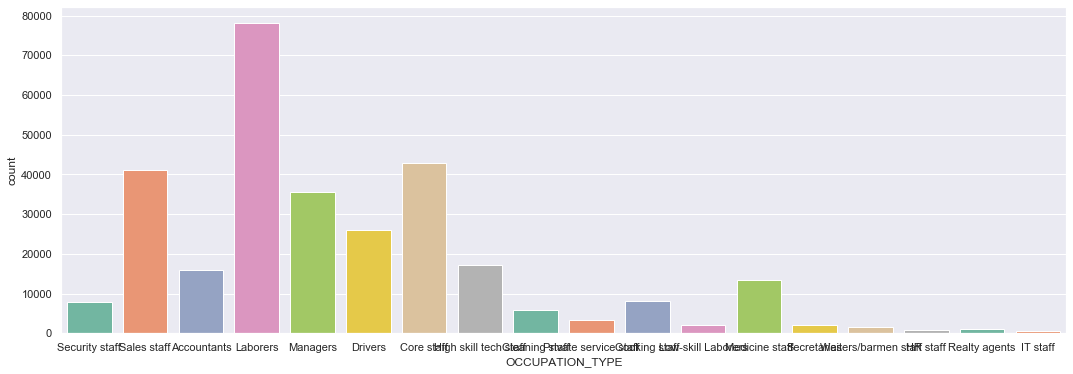

In [6]:
print("Number of people working status :")
print(app['OCCUPATION_TYPE'].value_counts())
sns.set(rc = {'figure.figsize':(18,6)})
sns.countplot(x='OCCUPATION_TYPE', data=app, palette = 'Set2')

Types of house of the peoples :
House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64


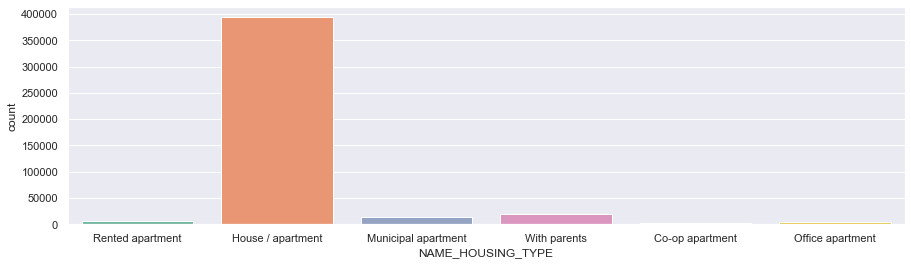

In [7]:
print("Types of house of the peoples :")
print(app['NAME_HOUSING_TYPE'].value_counts())
sns.set(rc = {'figure.figsize':(15,4)})
sns.countplot(x='NAME_HOUSING_TYPE', data=app, palette = 'Set2')

How many peoples own car :
N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64


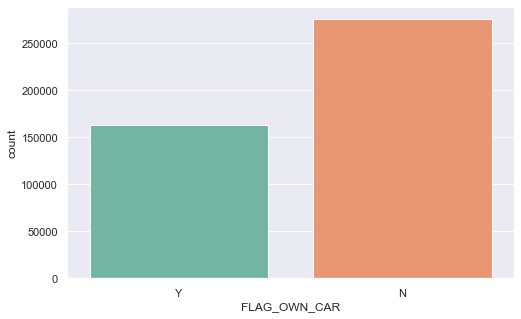

In [8]:
print("How many peoples own car :")
print(app['FLAG_OWN_CAR'].value_counts())
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(x='FLAG_OWN_CAR', data=app, palette = 'Set2')

Income Types Of the Person :
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64


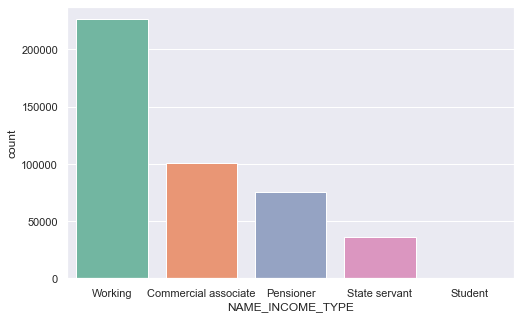

In [9]:
print("Income Types Of the Person :")
print(app['NAME_INCOME_TYPE'].value_counts())
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(x='NAME_INCOME_TYPE', data=app, palette = 'Set2')

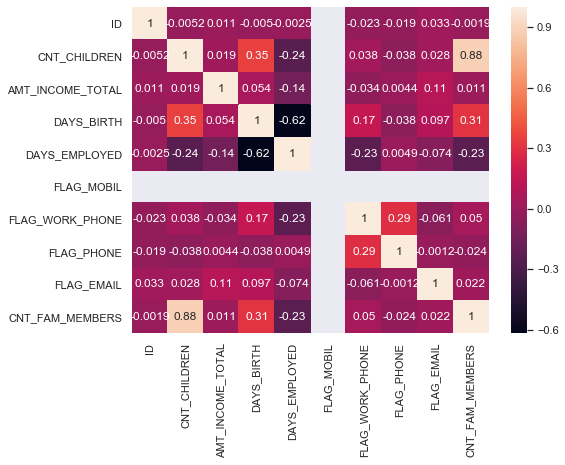

In [10]:
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(app.corr(),annot=True)

In [11]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
ID                     438557 non-null int64
CODE_GENDER            438557 non-null object
FLAG_OWN_CAR           438557 non-null object
FLAG_OWN_REALTY        438557 non-null object
CNT_CHILDREN           438557 non-null int64
AMT_INCOME_TOTAL       438557 non-null float64
NAME_INCOME_TYPE       438557 non-null object
NAME_EDUCATION_TYPE    438557 non-null object
NAME_FAMILY_STATUS     438557 non-null object
NAME_HOUSING_TYPE      438557 non-null object
DAYS_BIRTH             438557 non-null int64
DAYS_EMPLOYED          438557 non-null int64
FLAG_MOBIL             438557 non-null int64
FLAG_WORK_PHONE        438557 non-null int64
FLAG_PHONE             438557 non-null int64
FLAG_EMAIL             438557 non-null int64
OCCUPATION_TYPE        304354 non-null object
CNT_FAM_MEMBERS        438557 non-null float64
dtypes: float64(2), int64(8), object(8)
memory usage: 60.2+ MB


In [12]:
app.shape,credit.shape

((438557, 18), (1048575, 3))

In [13]:
app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [14]:
app.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [15]:
def unique_values():
    a = app.CODE_GENDER.unique()
    print("--------------CODE_GENDER--------------------------------------------")
    print(a)
    print()
    b = app.FLAG_OWN_CAR.unique()
    print("----------------------FLAG_OWN_CAR------------------------------------")
    print(b)
    print()
    c = app.FLAG_OWN_REALTY.unique()
    print('----------------------FLAG_OWN_REALTY--------------------------------------------')
    print(c)
    print()
    d = app.CNT_CHILDREN.unique()
    print('-------------------------CNT_CHILDREN-----------------------------------------')
    print(d)
    print()
    e = app.NAME_INCOME_TYPE.unique()
    print( '--------------------------NAME_INCOME_TYPE----------------------------------------')
    print(e)
    print()
    f = app.NAME_EDUCATION_TYPE.unique()
    print('--------------------------NAME_EDUCATION_TYPE----------------------------------------')
    print(f)
    print()
    g = app.NAME_FAMILY_STATUS.unique()
    print('--------------------------NAME_FAMILY_STATUS----------------------------------------')
    print(g)
    print()
    h = app.NAME_HOUSING_TYPE.unique()
    print('---------------------------NAME_HOUSING_TYPE---------------------------------------')
    print(h)
    print()
    i = app.OCCUPATION_TYPE.unique()
    print('------------------------OCCUPATION_TYPE------------------------------------------')
    print(i)
    print()
    j = app.CNT_FAM_MEMBERS.value_counts()
    print('----------------------------CNT_FAM_MEMBERS--------------------------------------')
    print(j)
    print()
    return unique_values

In [16]:
unique_values()

--------------CODE_GENDER--------------------------------------------
['M' 'F']

----------------------FLAG_OWN_CAR------------------------------------
['Y' 'N']

----------------------FLAG_OWN_REALTY--------------------------------------------
['Y' 'N']

-------------------------CNT_CHILDREN-----------------------------------------
[ 0  1  3  2  4  5 14 19  7  9 12  6]

--------------------------NAME_INCOME_TYPE----------------------------------------
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']

--------------------------NAME_EDUCATION_TYPE----------------------------------------
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

--------------------------NAME_FAMILY_STATUS----------------------------------------
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']

---------------------------NAME_HOUSING_TYPE---------------------------------------
['Rented apartment' 'House / a

<function __main__.unique_values()>

In [17]:
# dropping duplicate rows
app.drop_duplicates(subset = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'], keep = 'first', inplace = True)

app.shape

(90085, 18)

## Data Cleaning

In [18]:
def data_cleansing(data):
    # Adding number of family members with number of children to get overall family members.
    data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'] + data['CNT_CHILDREN']
    
    dropped_cols = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL','OCCUPATION_TYPE','CNT_CHILDREN']
    data = data.drop(dropped_cols, axis = 1)
    
    #converting birth years and days employed to years.
    data['DAYS_BIRTH'] = np.abs(data['DAYS_BIRTH']/365) #Absolute
    data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED']/365 
    
    #Cleaning up categorical values to lower the count of dummy variables.
    housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}
              
    income_type = {'Commercial associate':'Working',
                  'State servant':'Working',
                  'Working':'Working',
                  'Pensioner':'Pensioner',
                  'Student':'Student'}
    education_type = {'Secondary / secondary special':'secondary',
                     'Lower secondary':'secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}
    family_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                    'Married':'Married'}
    data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(housing_type)
    data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].map(income_type)
    data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].map(education_type)
    data['NAME_FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].map(family_status)
    return data

In [19]:
cleansed_app = data_cleansing(app)

In [20]:
cleansed_app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,427500.0,Working,Higher education,Married,House / apartment,32.890411,-12.443836,2.0
2,5008806,M,Y,Y,112500.0,Working,secondary,Married,House / apartment,58.832877,-3.106849,2.0
3,5008808,F,N,Y,270000.0,Working,secondary,Single,House / apartment,52.356164,-8.358904,1.0
7,5008812,F,N,Y,283500.0,Pensioner,Higher education,Single,House / apartment,61.545205,1000.665753,1.0
10,5008815,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,46.224658,-2.106849,2.0
13,5008819,M,Y,Y,135000.0,Working,secondary,Married,House / apartment,48.706849,-3.271233,2.0
19,5008825,F,Y,N,130500.0,Working,Higher education,Married,House / apartment,29.230137,-3.021918,2.0
21,5008830,F,N,Y,157500.0,Working,secondary,Married,House / apartment,27.482192,-4.024658,2.0
24,5008834,F,N,Y,112500.0,Working,secondary,Single,House / apartment,30.049315,-4.438356,3.0
27,5008836,M,Y,Y,270000.0,Working,secondary,Married,House / apartment,34.764384,-3.186301,8.0


In [21]:

# Data frame to analyze length of time since initial approval of credit card
# Shows number of past dues, paid off and no loan status.
grouped = credit.groupby('ID')

pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']
pivot_tb['window'] += 1 # Adding 1 since month starts at 0.

#Counting number of past dues, paid offs and no loans.
pivot_tb['paid_off'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'C'].count(axis = 1)
pivot_tb['pastdue_1-29'] = pivot_tb[pivot_tb.iloc[:,0:61] == '0'].count(axis = 1)
pivot_tb['pastdue_30-59'] = pivot_tb[pivot_tb.iloc[:,0:61] == '1'].count(axis = 1)
pivot_tb['pastdue_60-89'] = pivot_tb[pivot_tb.iloc[:,0:61] == '2'].count(axis = 1)
pivot_tb['pastdue_90-119'] = pivot_tb[pivot_tb.iloc[:,0:61] == '3'].count(axis = 1)
pivot_tb['pastdue_120-149'] = pivot_tb[pivot_tb.iloc[:,0:61] == '4'].count(axis = 1)
pivot_tb['pastdue_over_150'] = pivot_tb[pivot_tb.iloc[:,0:61] == '5'].count(axis = 1)
pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'X'].count(axis = 1)
#Setting Id column to merge with app data.
pivot_tb['ID'] = pivot_tb.index

In [22]:
pivot_tb.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,window,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,ID
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,0,3,0,0,0,0,0,1,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19,9,10,0,0,0,0,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,0,0,0,0,0,0,0,22,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,0,0,0,0,0,0,0,15,5001714
5001715,NaN,X,X,X,X,X,X,X,X,X,...,60,0,0,0,0,0,0,0,60,5001715


## Feature Engineering
**A ratio based method was used to create the target variable. For example, given a client with a time period of 60 months, if the client had paid off loan 40 times and was late 20 times, this would be considered a fairly good client given that there were more loans that were paid off on time compared to late payments. If a client had no loans throughout the initial approval of the credit card account, by default, this would be considered a good client as well. To identify a bad client, the number of past dues would exceed the number of loans paid off or if the client only has past dues. It may be better to incorporate a set difference between number of paid off loans and number of past dues. Meaning, there needs to be a significant gap between paid off loans and past dues. If a person has 50 past dues and 51 paid off loans, based on the ratio method, this would be considered good. However the difference is only 1 and this may not be a good sign of a good client. For simplicity sake, I will not adjust the algorithm further and keep it at ratio decisioning. Code is also not optimal, adjustment may be needed for the code to compute faster.**

In [23]:
def feature_engineering_target(data):
    good_or_bad = []
    for index, row in data.iterrows():
        paid_off = row['paid_off']
        over_1 = row['pastdue_1-29']
        over_30 = row['pastdue_30-59']
        over_60 = row['pastdue_60-89'] 
        over_90 = row['pastdue_90-119']
        over_120 = row['pastdue_120-149'] + row['pastdue_over_150']
        no_loan = row['no_loan']
            
        overall_pastdues = over_1+over_30+over_60+over_90+over_120    
            
        if overall_pastdues == 0:
            if paid_off >= no_loan or paid_off <= no_loan:
                good_or_bad.append(1)
            elif paid_off == 0 and no_loan == 1:
                good_or_bad.append(1)
        
        elif overall_pastdues != 0:
            if paid_off > overall_pastdues:
                good_or_bad.append(1)
            elif paid_off <= overall_pastdues:
                good_or_bad.append(0)
        
        elif paid_off == 0 and no_loan != 0:
            if overall_pastdues <= no_loan or overall_pastdues >= no_loan:
                good_or_bad.append(0)

        else:
            good_or_bad.append(1)
                
        
    return good_or_bad

There is data on clients in the credit data that intersect with the application data. the following is a merge between the two data frames given on the data of clients that exist in both data sets. Featured engineered additional columns from the credit data.

In [24]:
target = pd.DataFrame()
target['ID'] = pivot_tb.index
target['paid_off'] = pivot_tb['paid_off'].values
target['#_of_pastdues'] = pivot_tb['pastdue_1-29'].values+ pivot_tb['pastdue_30-59'].values
+ pivot_tb['pastdue_60-89'].values +pivot_tb['pastdue_90-119'].values
+pivot_tb['pastdue_120-149'].values +pivot_tb['pastdue_over_150'].values

target['no_loan'] = pivot_tb['no_loan'].values
target['target'] = feature_engineering_target(pivot_tb)
credit_app = cleansed_app.merge(target, how = 'inner', on = 'ID')
credit_app.drop('ID', axis = 1, inplace = True)

In [25]:
credit_app.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,#_of_pastdues,no_loan,target
0,M,Y,Y,427500.0,Working,Higher education,Married,House / apartment,32.890411,-12.443836,2.0,13,2,1,1
1,M,Y,Y,112500.0,Working,secondary,Married,House / apartment,58.832877,-3.106849,2.0,7,7,16,0
2,F,N,Y,270000.0,Working,secondary,Single,House / apartment,52.356164,-8.358904,1.0,0,2,3,0
3,F,N,Y,283500.0,Pensioner,Higher education,Single,House / apartment,61.545205,1000.665753,1.0,0,14,3,0
4,M,Y,Y,270000.0,Working,Higher education,Married,House / apartment,46.224658,-2.106849,2.0,0,6,0,0


In [26]:
from sklearn.preprocessing import LabelEncoder

cg = LabelEncoder()
oc = LabelEncoder()
own_r = LabelEncoder()
it = LabelEncoder()
et = LabelEncoder()
fs = LabelEncoder()
ht = LabelEncoder()


credit_app['CODE_GENDER'] = cg.fit_transform(credit_app['CODE_GENDER'])
credit_app['FLAG_OWN_CAR'] = oc.fit_transform(credit_app['FLAG_OWN_CAR'])
credit_app['FLAG_OWN_REALTY'] = own_r.fit_transform(credit_app['FLAG_OWN_REALTY'])
credit_app['NAME_INCOME_TYPE'] = it.fit_transform(credit_app['NAME_INCOME_TYPE'])
credit_app['NAME_EDUCATION_TYPE'] = et.fit_transform(credit_app['NAME_EDUCATION_TYPE'])
credit_app['NAME_FAMILY_STATUS'] = fs.fit_transform(credit_app['NAME_FAMILY_STATUS'])
credit_app['NAME_HOUSING_TYPE'] = ht.fit_transform(credit_app['NAME_HOUSING_TYPE'])
    
    

In [27]:
print("CODE_GENDER",credit_app['CODE_GENDER'].unique())
print(cg.inverse_transform(list(credit_app['CODE_GENDER'].unique())))
print()
print("FLAG_OWN_CAR:",credit_app['FLAG_OWN_CAR'].unique())
print(oc.inverse_transform(list(credit_app['FLAG_OWN_CAR'].unique())))
print()
print("FLAG_OWN_REALTY", credit_app['FLAG_OWN_REALTY'].unique())
print(own_r.inverse_transform(list(credit_app['FLAG_OWN_REALTY'].unique())))
print()
print("NAME_INCOME_TYPE",credit_app['NAME_INCOME_TYPE'].unique())
print(it.inverse_transform(list(credit_app['NAME_INCOME_TYPE'].unique())))
print()
print("NAME_EDUCATION_TYPE",credit_app['NAME_EDUCATION_TYPE'].unique())
print(et.inverse_transform(list(credit_app['NAME_EDUCATION_TYPE'].unique())))
print()
print("NAME_FAMILY_STATUS",credit_app['NAME_FAMILY_STATUS'].unique())
print(fs.inverse_transform(list(credit_app['NAME_FAMILY_STATUS'].unique())))
print()
print("NAME_HOUSING_TYPE",credit_app['NAME_HOUSING_TYPE'].unique())
print(ht.inverse_transform(list(credit_app['NAME_HOUSING_TYPE'].unique())))

CODE_GENDER [1 0]
['M' 'F']

FLAG_OWN_CAR: [1 0]
['Y' 'N']

FLAG_OWN_REALTY [1 0]
['Y' 'N']

NAME_INCOME_TYPE [2 0 1]
['Working' 'Pensioner' 'Student']

NAME_EDUCATION_TYPE [1 2 0]
['Higher education' 'secondary' 'Academic degree']

NAME_FAMILY_STATUS [0 1]
['Married' 'Single']

NAME_HOUSING_TYPE [0 1]
['House / apartment' 'With parents']


In [28]:
x = credit_app[credit_app.drop('target', axis = 1).columns]
y = credit_app['target']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 0)

Imported SMOTE in case of high imbalance of target variable. However, it does not seem to be highly imbalanced so it is fine not to use an imbalanced technique.

In [29]:
def logistic_reg(xtrain,xtest,ytrain,ytest):
    lr=LogisticRegression(solver='liblinear')
    lr.fit(xtrain,ytrain)
    ypred=lr.predict(xtest)
    print('***LogisticRegression***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))
   

In [42]:
def random_forest(xtrain,xtest,ytrain,ytest):
    rf=RandomForestClassifier()
    rf.fit(xtrain,ytrain)
    ypred=rf.predict(xtest)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))
   

In [43]:
def g_boosting(xtrain,xtest,ytrain,ytest):
    gb=GradientBoostingClassifier()
    gb.fit(xtrain,ytrain)
    ypred=gb.predict(xtest)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))
 

In [44]:
def d_tree(xtrain,xtest,ytrain,ytest):
    dt=DecisionTreeClassifier()
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(ytest,ypred))
    print('Classification report')
    print(classification_report(ytest,ypred))

In [45]:
def compare_model(xtrain,xtest,ytrain,ytest):
    logistic_reg(xtrain,xtest,ytrain,ytest)
    print('-'*100)
    random_forest(xtrain,xtest,ytrain,ytest)
    print('-'*100)
    g_boosting(xtrain,xtest,ytrain,ytest)
    print('-'*100)
    d_tree(xtrain,xtest,ytrain,ytest)

In [46]:
compare_model(xtrain,xtest,ytrain,ytest)

***LogisticRegression***
Confusion matrix
[[1560   30]
 [  52 1271]]
Classification report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1590
           1       0.98      0.96      0.97      1323

    accuracy                           0.97      2913
   macro avg       0.97      0.97      0.97      2913
weighted avg       0.97      0.97      0.97      2913

----------------------------------------------------------------------------------------------------


E:\ammu\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


***RandomForestClassifier***
Confusion matrix
[[1571   19]
 [  42 1281]]
Classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1590
           1       0.99      0.97      0.98      1323

    accuracy                           0.98      2913
   macro avg       0.98      0.98      0.98      2913
weighted avg       0.98      0.98      0.98      2913

----------------------------------------------------------------------------------------------------
***GradientBoostingClassifier***
Confusion matrix
[[1583    7]
 [   8 1315]]
Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1590
           1       0.99      0.99      0.99      1323

    accuracy                           0.99      2913
   macro avg       0.99      0.99      0.99      2913
weighted avg       0.99      0.99      0.99      2913

---------------------------------------------------

In [51]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [52]:
 dt.predict([[1,1,1,112500.0,2,2,0,0,58.832877,-3.106849,2.0,7,7,16]])

array([0], dtype=int64)

In [53]:
import pickle
pickle.dump(dt,open("model.pkl","wb"))

In [54]:
# predictions_test = rf.predict([[1,1,1,112500.0,2,2,0,0,58.832877,-3.106849,2.0,7,7,16]])